# Regressão Linear simples

Dada uma coleção de valores numéricos que representam uma
variável e uma variável dependente, a regressão linear simples descreve a relação
entre essas variáveis ​​com uma linha reta, conhecida como linha de regressão.



Considere realizar uma regressão linear simples em uma série temporal das temperaturas médias em Nova Iorque de 1895 a 2018.

In [1]:
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [4]:
nyc.Date = nyc.Date.floordiv(100)

In [5]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Dividindo os dados para treinamento e teste
Neste exemplo, usaremos o estimador **LinearRegression** de **sklearn.linear_model**.
- Por padrão, este estimador usa todos os atributos numéricos em um conjunto de dados. 

Aqui, executaremos uma regressão linear simples, usando um único atributo como variável independente. Portanto, precisamos selecionar um atributo (a Data) do conjunto de dados.
- Quando você seleciona uma coluna de um DataFrame bidimensional, o resultado é uma **Serie** unidimensional.
No entanto, os estimadores do scikit-learn exigem em seu treinamento e teste que os 
dados sejam matrizes bidimensionais (ou dados semelhantes a matrizes bidimensionais, como listas de listas ou pandas DataFrames). 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
        random_state=11)

A expressão **nyc.Date** retorna a **Serie** da coluna **Data** e o atributo **values** da **Serie** retorna um array **NumPy** contendo os valores dessa **Serie**. 

- Para transformar esse array unidimensional em duas dimensões, chamamos o método **reshape** do array. 
    - Normalmente, dois argumentos são o número preciso de linhas e colunas. 
    - No entanto, o primeiro argumento -1 diz a **reshape** para inferir o número de linhas, com base no número de colunas (1) e o número de elementos (124) na matriz. 

Podemos confirmar a divisão de teste de trem de 75% -25% verificando as formas de X_train e
X_test:

In [20]:
X_train.shape

(93, 1)

In [21]:
X_test.shape

(31, 1)

### Treinando o modelo
O Scikit-learn não tem uma classe separada para regressão linear simples porque é apenas um especial caso de regressão linear múltipla, então vamos treinar um estimador **LinearRegression**

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear_regression = LinearRegression()

In [24]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

Agora, podemos obter a inclinação e a interceptação usadas no cálculo $y = b + mx$  para fazer
previsões. 
- A inclinação é armazenada no atributo **coeff_** do estimador ($m$ na quação) e
a interceptação é armazenada no atributo **intercept_** do estimador ($b$ na equação):

In [25]:
linear_regression.coef_

array([0.01939167])

In [26]:
linear_regression.intercept_

-0.30779820252656975

Vamos testar o modelo usando os dados em *X_test* e verificar algumas das previsões ao longo
do conjunto de dados exibindo os valores previstos e esperados para cada cinco elementos.

In [27]:
predicted = linear_regression.predict(X_test)

In [28]:
expected = y_test

In [66]:
for d, p, e in zip(X_test[::5], predicted[::5], expected[::5]):
    print(f'date: {d} -> predicted: {p:.2f}, expected: {e:.2f}')

date: [1968] -> predicted: 37.86, expected: 31.70
date: [2011] -> predicted: 38.69, expected: 34.80
date: [1924] -> predicted: 37.00, expected: 39.40
date: [1937] -> predicted: 37.25, expected: 45.70
date: [1978] -> predicted: 38.05, expected: 32.30
date: [1957] -> predicted: 37.64, expected: 33.80
date: [1921] -> predicted: 36.94, expected: 39.70


### Visualizando o conjunto de dados com a linha de regressão

A seguir, vamos criar um gráfico de dispersão do conjunto de dados usando a função de gráfico de dispersão do Seaborn e a função de plot do Matplotlib. 

In [46]:
import seaborn as sns

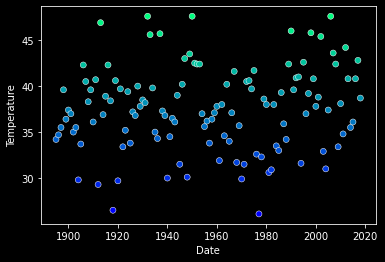

In [47]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

Os argumentos de **scatterplot** são:
- *data*, que especifica o DataFrame (nyc) que contém os dados a serem exibidos.
- *x* e *y*, que especificam os nomes das colunas de nyc que são a fonte dos dados ao longo dos eixos x e y, respectivamente. Neste caso, x é a 'Data' e y é a 'Temperatura'. Os valores correspondentes de cada coluna formam a coordenada x-y pares usados para traçar os pontos.
- *hue* especifica quais dados da coluna devem ser usados para determinar as cores. Neste caso, usamos a coluna 'Temperatura'. 
- *palette*, que especifica um mapa de cores Matplotlib.
- *legend = False* especifica que o gráfico de dispersão não deve mostrar uma legenda para o gráfico - o padrão é True, mas não precisamos de uma legenda para este exemplo.

In [48]:
axes.set_ylim(10, 70)

(10.0, 70.0)

A seguir, vamos exibir a linha de regressão. Primeiro, crie uma matriz contendo os valores mínimo e máximos de nyc.Data. Estas são as coordenadas x da linha de regressão
pontos inicial e final:

In [49]:
import numpy as np

In [50]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [51]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [52]:
y = predict(x)

In [53]:
import matplotlib.pyplot as plt

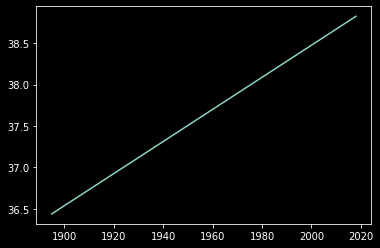

In [54]:
line = plt.plot(x, y)

In [55]:
predict(2035)

array([39.15425695])

# Regressão multilinear

O conjunto de dados [California Housing](http://lib.stat.cmu.edu/datasets) tem 20.640 amostras, cada uma 
com oito atributos numéricos. 
- Faremos uma regressão linear múltipla que usa todos os oito atributos numéricos para fazer previsões de preços de habitação.

De acordo com a descrição do conjunto de dados California Housing Price no scikit-learn,  
o conjunto de dados foi derivado do censo dos EUA de 1990. usando uma linha para cada grupo de bloco do censo. Um
grupo de blocos é a menor unidade geográfica para a qual o U.S. Census Bureau publica
dados de amostra (um grupo de blocos normalmente tem uma população de 600 a 3.000 pessoas).  
O conjunto de dados tem 20.640 amostras - uma por grupo de blocos - com oito atributos cada:
-  renda média - em dezenas de milhares, então 8,37 representaria US 83.700 
-  idade média da casa - no conjunto de dados, o valor máximo para deste atributo é 52
-  número médio de quartos
-  número médio de quartos
-  população do bloco
-  ocupação média da casa
-  latitude do bloco de casa
-  longitude do bloco de casa

Cada amostra também tem como meta um valor mediano de casa correspondente em centenas de milhares,
então 3,55 representaria US 355.000. No conjunto de dados, o valor máximo para este recurso é 5, o que representa US 500.000.
É razoável esperar que mais quartos ou mais quartos ou renda mais alta significa maior valor da casa. Ao combinar esses recursos para fazer previsões, temos mais probabilidade de obter previsões mais precisas.

Vamos carregar o conjunto de dados e nos familiarizar com ele. A função **fetch_california_housing**
do módulo **sklearn.datasets** retorna um objeto **Bunch** contendo os dados e outras informações sobre o conjunto de dados:

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
california.data.shape

(20640, 8)

In [5]:
california.target.shape

(20640,)

In [6]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Explorando os dados com DataFrame

In [7]:
import pandas as pd

In [8]:
pd.set_option('precision', 4)

*precistion* corresponde ao número máximo de dígitos a serem exibidos à direita de cada decimal ponto.

In [9]:
pd.set_option('max_columns', 9)

'max_columns' é o número máximo de colunas a serem exibidas quando você produz a representação de string do DataFrame. 
Por padrão, se o pandas não consegue colocar todas as colunas da esquerda para a direita, ele corta as colunas do meio e exibe reticências (…). 
- A configuração 'max_columns' permite que o pandas mostrem todas as colunas usando várias linhas de saída. 

In [10]:
pd.set_option('display.width', None)

display.width' especifica a largura em caracteres do seu prompt de comando (Windows), Terminal (macOS / Linux) ou shell (Linux). O valor *None* diz ao pandas para detectar automaticamente a largura da tela ao formatar representações de string de
Series e DataFrames.

Em seguida, vamos criar um **DataFrame** a partir dos arrays data, target e feature_names do objeto Bunch.
- Abaixo o cria DataFrame inicial é criado usando os dados em california.data e com os nomes das colunas especificados por california.feature_names. 
- A segunda declaração adiciona uma coluna para os valores medianos da casa armazenados em california.target:

In [11]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [12]:
california_df['MedHouseValue'] = pd.Series(california.target)

In [13]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [14]:
california_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09,0.781
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21,0.771
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22,0.923
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32,0.847
20639,2.3886,16.0,5.2547,1.1623,1387.0,2.6170,39.37,-121.24,0.894


In [15]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


## Visualizando atributos

É útil visualizar seus dados plotando a saida em relação a cada atributo - neste
caso, para ver como o valor residencial mediano se relaciona com cada característica. 

- Para tornar mais clara nossas visualizações, vamos usar uma amostra dos dados, selecionando aleatoriamente 10% das 20.640 instâncias:

In [16]:
sample_df = california_df.sample(frac=0.1, random_state=17)

O argumetno **frac** especifica a fração dos dados selecionados (0,1 para 10%), e o argumento **random_state** permite que você ajuste a semente do gerador aleatório. 
- O valor de semente inteiro (17), que escolhemos arbitrariamente, é crucial para a reprodutibilidade. Cada vez que você usa o mesmo valor de semente, a amostra do método seleciona o mesmo subconjunto aleatório de linhas do DataFrame.

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [19]:
sns.set(font_scale=2)

In [20]:
sns.set_style('whitegrid')

In [21]:
%matplotlib

Using matplotlib backend: TkAgg


In [139]:
for feature in california.feature_names:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

### Dividindo os dados para treinamento e teste

Para preparar os dados para o treinamento e teste do modelo, vamos dividir os dados em conjunto de treinamento
e conjunto de teste usando a função **train_test_split**, em seguida, verificar seus tamanhos: e o mesmo valor de semente, a amostra do método seleciona o mesmo subconjunto aleatório de linhas do DataFrame. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [24]:
X_train.shape

(15480, 8)

In [25]:
X_test.shape

(5160, 8)

### Treinando o modelo

A seguir, vamos treinar o modelo. Por padrão, um estimador **LinearRegression** usa todos os atributos do conjunto de dados  para realizar uma regressão linear múltipla. 
- Ocorrerá um erro se houver atributos categóricos em vez de numéricos. 
    - Se um conjunto de dados contém dados categóricos, você também deve pré-processar os recursos categóricos em números. 

Uma vantagem de trabalhar com os conjuntos de dados do scikit-learn é que eles já estão no formato para aprendizado de máquina usando modelos do scikit-learn. 
Como você viu nos dois trechos anteriores, X_train e X_test cada um contém 8 colunas — uma por atributo. Vamos criar um estimador linear (do objeto **LinearRegression**) e ajusta-lo usando X_train e y_train:

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression = LinearRegression()

In [28]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

A regressão linear múltipla produz coeficientes separados para cada atributo (armazenado em **coeff_**) no conjunto de dados e uma interceptação (armazenada em **intercept_**):

In [29]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382204
  HouseAge: 0.009216834565797674
  AveRooms: -0.10732526637360945
 AveBedrms: 0.6117133073918104
Population: -5.756822009291354e-06
  AveOccup: -0.0033845664657163156
  Latitude: -0.4194818609649073
 Longitude: -0.4337713349874023


In [30]:
linear_regression.intercept_

-36.882950656055556

Para coeficientes positivos, o valor mediano da casa aumenta conforme o valor do recurso aumenta. Para
coeficientes negativos, o valor mediano da casa diminui conforme o valor do recurso aumenta. 

- Note que o coeficiente da população tem um expoente negativo (e-06), então o valor do coeficiente é na verdade -0,000005756822009298454. Isso é perto de zero, então a população de um grupo de bloco aparentemente tem pouco efeito no valor médio da casa. Você pode usar esses valores com a seguinte equação para fazer previsões:

$y = m_1x_1 + m_2x_2 + … m_nx_n + b$

- $m_1, m_2, …, m_n$ são os coeficientes,
- $b$ é o viés (intercept),
- $x_1, x_2, …, x_n$ são os valores de atributos,
- $y$ é o valor predito.

### Testando o modelo

Agora, vamos testar o modelo chamando o método de previsão (**predict**) do estimador com as amostras de teste como um argumento. 

In [31]:
predicted = linear_regression.predict(X_test)

In [32]:
expected = y_test

In [33]:
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [34]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

In [35]:
for p, e in zip(predicted[:100:5], expected[:100:5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 1.25, expected: 0.76
predicted: 2.36, expected: 2.39
predicted: 1.89, expected: 2.02
predicted: 3.13, expected: 2.99
predicted: 2.61, expected: 2.41
predicted: 0.94, expected: 0.53
predicted: 2.23, expected: 1.58
predicted: 2.12, expected: 1.49
predicted: 2.55, expected: 3.80
predicted: 2.51, expected: 2.03
predicted: 2.34, expected: 1.74
predicted: 2.51, expected: 2.89
predicted: 5.99, expected: 5.00
predicted: 0.91, expected: 1.06
predicted: 1.71, expected: 1.51
predicted: 2.17, expected: 3.02
predicted: 1.44, expected: 0.75
predicted: 2.94, expected: 2.48
predicted: 2.04, expected: 2.15
predicted: 1.92, expected: 1.26


### Visualizando os Preços Esperados vs. Previstos

Vejamos os valores médios esperados vs. previstos para os dados de teste. Primeiro, vamos
criar um DataFrame contendo colunas para os valores esperados e previstos:

In [36]:
df = pd.DataFrame()

In [37]:
df['Expected'] = pd.Series(expected)

In [38]:
df['Predicted'] = pd.Series(predicted)

Agora vamos plotar os dados como um gráfico de dispersão com os preços esperados (alvo) ao longo do eixo x
e os preços previstos ao longo do eixo y:

In [39]:
figure = plt.figure(figsize=(9, 9))

In [40]:
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

A seguir, vamos definir os limites dos eixos x e y para usar a mesma escala ao longo de ambos os eixos:

In [41]:
start = min(expected.min(), predicted.min())

In [42]:
end = max(expected.max(), predicted.max())

In [43]:
axes.set_xlim(start, end)

(-0.6830978604144633, 7.15571981849682)

Agora, vamos traçar uma linha que representa as previsões perfeitas (observe que isso não é a linha de regressão). 
- O snippet a seguir exibe uma linha entre os pontos que representam o canto inferior esquerdo do gráfico (início, início) e o canto superior direito do gráfico (fim, fim). 
- O terceiro argumento ('k--') indica o estilo da linha. A letra k representa a cor preta, e o - indica que o gráfico deve desenhar uma linha tracejada:

In [44]:
line = plt.plot([start, end], [start, end], 'k--')

### Métricas do modelo de regressão

Scikit-learn fornece muitas funções de métricas para avaliar quão bem os estimadores prevêem os resultados e para comparar estimadores para escolher o(s) melhor(es) para o seu estudo particular.
- Essas métricas variam de acordo com o tipo de estimador. Entre as muitas métricas para estimadores de regressão está o coeficiente de determinação do modelo, que também é chamado $R^2$. Para o calculo de $R^2$ de um estimador, chame o função **r2_score** do módulo **sklearn.metrics** com os arrays que representam o esperado e resultados previstos:

In [115]:
from sklearn import metrics

In [116]:
metrics.r2_score(expected, predicted)

0.6008983115964333

O $R^2$ varia de 0,0 a 1,0, sendo 1,0 o ajuste perfeito. 
- Uma pontuação de $R^2$ de 1,0 indica que o estimador prediz perfeitamente o valor da variável dependente, dado os valores das variáveis independentes. 
- Uma pontuação de $R^2$ de 0,0 indica que o modelo não pode fazer previsões com nenhuma precisão, com base nos valores das variáveis independentes.

Outra métrica comum para modelos de regressão é o erro quadrático médio, que calcula a diferença entre cada valor esperado e previsto. 

In [117]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449119